In [1]:
%conda install  matplotlib=3.0.3

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda




In [63]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np
# from scipy.misc import imresize
from scipy.spatial import distance
from IPython.display import display
from skimage.transform import rescale, resize
import scipy.stats as spstat
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import WLS
# OG_DATA_PATH = './TaskPerformance/'
PLOTS_PATH = './Seahaven_VR_Map_comp_paper/'
POS_PATH = './PositionsData/'
EYE_DATA_PATH = './ET_data/'
CSV_PATH = './csv_files'
MOUSE_DATA_PATH = './MouseData'
os.makedirs(os.path.dirname(PLOTS_PATH), exist_ok=True)


# 1. Accuracy as a function of group, task and time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
Subject     264 non-null int64
Task        264 non-null object
Time        264 non-null object
Accuracy    264 non-null float64
Group       264 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ KB


None

,Group,Subject,Task,Time,Accuracy [%]
0,Map,1719,Absolute,3s,50.000000
1,Map,1719,Absolute,Inf,61.111111
2,Map,1719,Pointing,3s,44.444444
3,Map,1719,Pointing,Inf,44.444444
4,Map,1719,Relative,3s,50.000000
...,...,...,...,...,...
259,VR,9961,Absolute,Inf,55.555556
260,VR,9961,Pointing,3s,41.666667
261,VR,9961,Pointing,Inf,61.111111
262,VR,9961,Relative,3s,47.222222


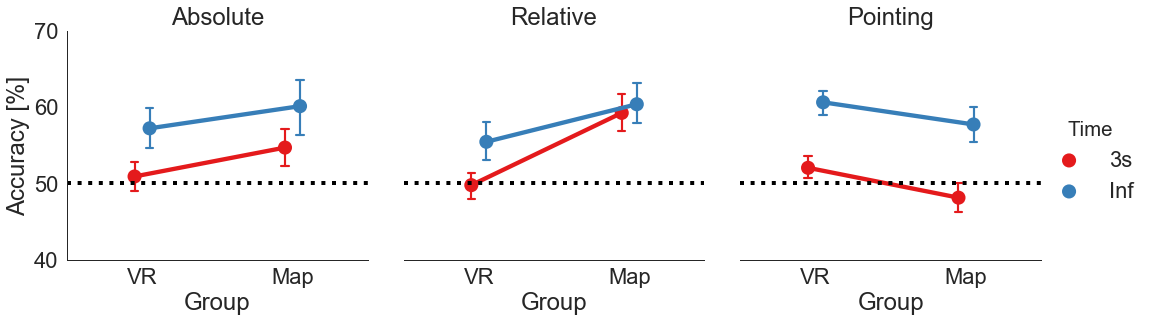

In [3]:
tmpdf = pd.read_csv(CSV_PATH + '/seahaven_group_task_time_accuracy.csv')
display(tmpdf.info())
tmpdf.Accuracy = tmpdf.Accuracy*100
tmpdf = (
    tmpdf
    .groupby(['Group','Subject','Task','Time'])
    .agg({'Accuracy':'mean'})
    .rename(columns={'Accuracy':'Accuracy [%]'})
    .reset_index()
#     .query('Time == "Inf"')
)

display(tmpdf)
sns.set(context = "paper", style="white", palette="Set1", font_scale=2.5, rc={'figure.figsize':(12,9)})
g = sns.catplot(data=tmpdf, x='Group', y='Accuracy [%]',hue='Time', kind='point',
                col='Task', col_order=['Absolute','Relative','Pointing'], order=["VR", "Map"],
                 ci=68, capsize=0.05, 
                dodge=0.1,scale=2
#                  edgecolor=(0,0,0),errwidth=3,linewidth=2.5
           )

g.set(yticks=np.arange(40,80,10))
i=0
for ax,title in zip(g.axes.flat,['Absolute','Relative','Pointing']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i != 1 :
        ax.spines['left'].set_visible(False)
    ax.set(ylim=(40,70))
    ax.set_title(title)
plt.savefig(PLOTS_PATH+'/group_task_time_accuracy.png', quality=90)
plt.savefig(PLOTS_PATH+'/group_task_time_accuracy.eps', quality=90)

# 2. Accuracy as function of Alignment to North

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 5 columns):
Subject         616 non-null int64
AngleToNorth    616 non-null int64
Time            616 non-null object
Accuracy        616 non-null float64
Group           616 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 24.2+ KB


None

,Group,Subject,AngleToNorth,Time,Accuracy [%]
0,VR,1089,0,3s,25.000000
1,VR,1089,0,Inf,0.000000
2,VR,1089,30,3s,33.333333
3,VR,1089,30,Inf,60.000000
4,VR,1089,60,3s,28.571429
...,...,...,...,...,...
611,map,9864,120,Inf,0.000000
612,map,9864,150,3s,16.666667
613,map,9864,150,Inf,0.000000
614,map,9864,180,3s,0.000000


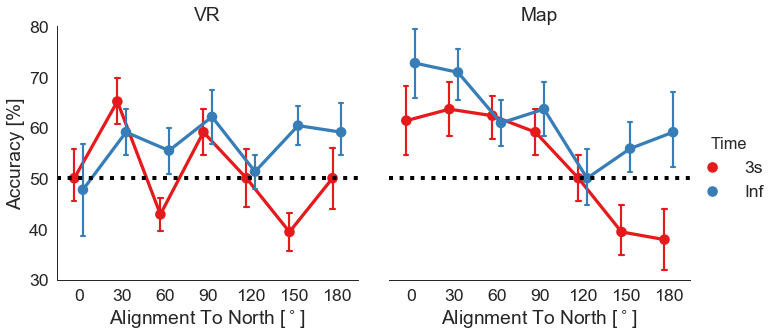

In [4]:
tmpdf = pd.read_csv(CSV_PATH + '/seahaven_group_angletonorth_time_accuracy.csv')
display(tmpdf.info())
tmpdf.Accuracy = tmpdf.Accuracy*100
tmpdf = (
    tmpdf
    .groupby(['Group','Subject','AngleToNorth','Time'])
    .agg({'Accuracy':'mean'})
    .rename(columns={'Accuracy':'Accuracy [%]'})
    .reset_index()
#     .query('Time == "Inf"')
)

display(tmpdf)
sns.set(context = "paper", style="white", palette="Set1", font_scale=2, rc={'figure.figsize':(12,15)})
g = sns.catplot(data=tmpdf, x='AngleToNorth', y='Accuracy [%]',hue='Time', 
                kind='point',dodge=0.2,scale = 1.5,
                col='Group', 
                ci=68, capsize=0.1, 
#                  edgecolor=(0,0,0),errwidth=3,linewidth=2
           )

g.set(yticks=np.arange(30,90,10))
i=0
for ax,title in zip(g.axes.flat,['VR','Map']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i != 1 :
        ax.spines['left'].set_visible(False)
    ax.set(ylim=(30,80),xlabel='Alignment To North [$^\circ$]')
    ax.set_title(title)
    
plt.savefig(PLOTS_PATH+'/group_alignmentToNorth_time_accuracy.png', quality=90)

# 3. Accuracy as function of angular difference between houses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 6 columns):
Subject        1584 non-null int64
Task           1584 non-null object
Time           1584 non-null object
AngularDiff    1584 non-null int64
Accuracy       1584 non-null float64
Group          1584 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 74.4+ KB


None

,Group,Subject,AngularDiff,Time,Accuracy [%]
0,VR,1089,30,3s,44.444444
1,VR,1089,30,Inf,55.555556
2,VR,1089,60,3s,55.555556
3,VR,1089,60,Inf,50.000000
4,VR,1089,90,3s,44.444444
...,...,...,...,...,...
523,map,9864,120,Inf,38.888889
524,map,9864,150,3s,22.222222
525,map,9864,150,Inf,55.555556
526,map,9864,180,3s,44.444444


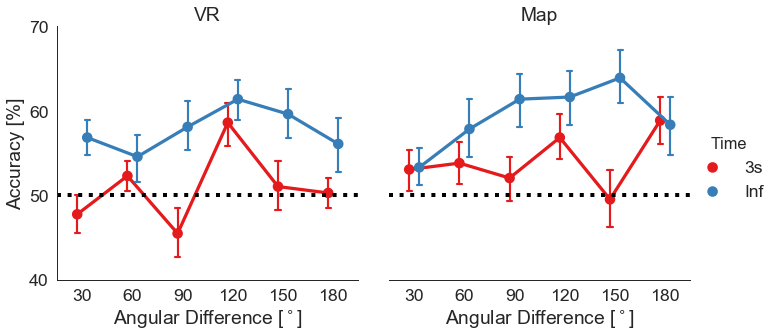

In [5]:
tmpdf = pd.read_csv(CSV_PATH + '/seahaven_group_angulardifference_time_accuracy.csv')
display(tmpdf.info())
tmpdf.Accuracy = tmpdf.Accuracy*100
tmpdf = (
    tmpdf
    .groupby(['Group','Subject','AngularDiff','Time'])
    .agg({'Accuracy':'mean'})
    .rename(columns={'Accuracy':'Accuracy [%]'})
    .reset_index()
#     .query('Time == "Inf"')
)

display(tmpdf)
sns.set(context = "paper", style="white", palette="Set1", font_scale=2, rc={'figure.figsize':(12,15)})
g = sns.catplot(data=tmpdf, x='AngularDiff', y='Accuracy [%]',hue='Time', 
                kind='point',dodge=0.2,scale = 1.5,
                col='Group', 
                ci=68, capsize=0.1, 
#                  edgecolor=(0,0,0),errwidth=3,linewidth=2
           )

g.set(yticks=np.arange(30,90,10))
i=0
for ax,title in zip(g.axes.flat,['VR','Map']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i != 1 :
        ax.spines['left'].set_visible(False)
    ax.set(ylim=(40,70),xlabel='Angular Difference [$^\circ$]')
    ax.set_title(title)
    
plt.savefig(PLOTS_PATH+'/group_angulardifference_time_accuracy.png', quality=90)

# 4. Accuracy as a function of distance

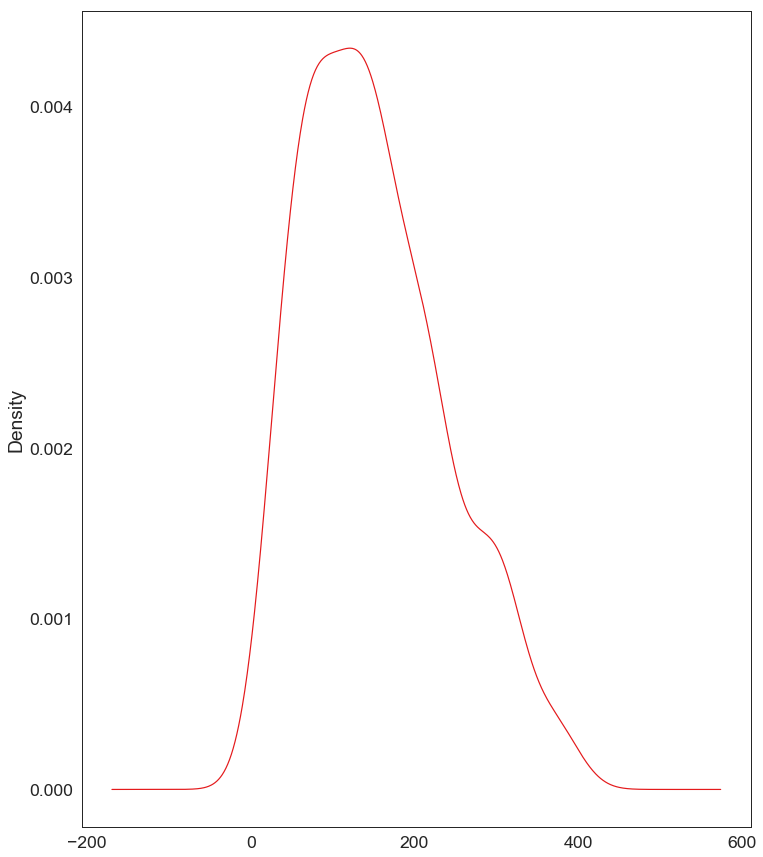

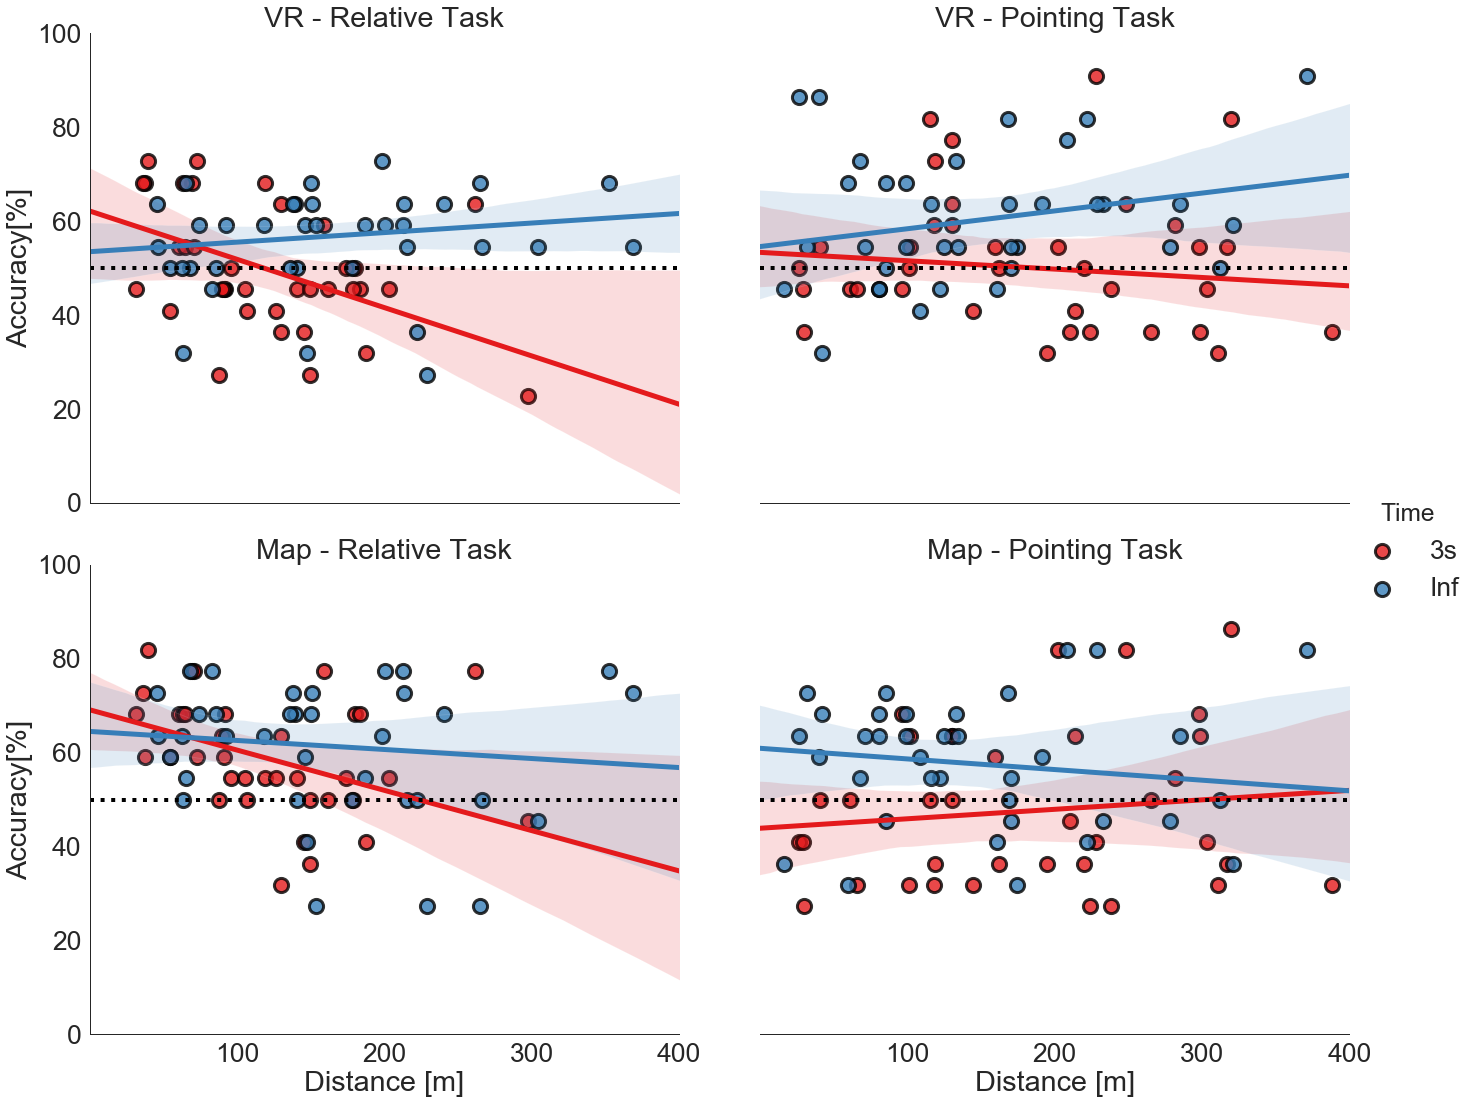

In [6]:
tmpdf = pd.concat(
    [pd.read_csv(CSV_PATH+'/seahaven_VR_rel_point_distance_accuracy.csv'),
     pd.read_csv(CSV_PATH+'/seahaven_map_rel_point_distance_accuracy.csv')]
)
tmpdf.Accuracy = tmpdf.Accuracy*100
tmpdf.distance_prime_target.plot.kde()
# display(tmpdf)

sns.set(context = "paper", style="white", palette="Set1", font_scale=3, rc={'figure.figsize':(10,10)})

g = sns.lmplot(data=tmpdf, x='distance_prime_target', y='Accuracy',hue='Time', 
               col='Task',row='Group', 
               x_ci='ci', ci=95, n_boot=1000,robust=True,
               height=8, aspect=1.2, 
               scatter_kws={"s": 200, 'edgecolors':'k', 'linewidths': 3},
               line_kws={'linewidth': 5})

i=0
for ax,title in zip(g.axes.flat,['VR - Relative Task','VR - Pointing Task','Map - Relative Task', 'Map - Pointing Task']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i != 1 and i!=3 :
        ax.spines['left'].set_visible(False)
#     ax.set(ylim=(40,70),xlabel='Angular Difference [$^\circ$]')
    ax.set_title(title)

g = (
    g
    .set_axis_labels("Distance [m]", "Accuracy[%]")
    .set(yticks=[0,20,40,60,80,100], ylim=(0,100))
    .set(xticks=[100,200,300,400], xlim=(0,400))
)

plt.savefig(PLOTS_PATH+'/group_distance_time_accuracy.png', quality=90)

# 4.1 Modelling Accuracy as function of distance for Relative Task

In [7]:
print(f'Bonferroni corrected p-value threshold = {0.05/4}')

Bonferroni corrected p-value threshold = 0.0125


In [8]:
tmpdf = pd.concat(
    [pd.read_csv(CSV_PATH+'/seahaven_VR_rel_point_distance_accuracy.csv'),
     pd.read_csv(CSV_PATH+'/seahaven_map_rel_point_distance_accuracy.csv')]
)
# display(df.distance_prime_target.shape)
task = 'Relative'
df = tmpdf.query('Group =="VR" and Task==@task and Time=="3s"')
print(f'Distance effect for VR {task} 3s')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values))
df = tmpdf.query('Group =="VR" and Task==@task and Time=="Inf"')
print(f'Distance effect for VR {task} Inf')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))
df = tmpdf.query('Group =="Map" and Task==@task and Time=="3s"')
print(f'Distance effect for Map {task} 3s')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))
df = tmpdf.query('Group =="Map" and Task==@task and Time=="Inf"')
print(f'Distance effect for Map {task} Inf')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))

Distance effect for VR Relative 3s


SpearmanrResult(correlation=-0.40204540841730524, pvalue=0.015069886922248905)

Distance effect for VR Relative Inf


SpearmanrResult(correlation=0.18157370933575953, pvalue=0.28921959594550983)

Distance effect for Map Relative 3s


SpearmanrResult(correlation=-0.4409424049853202, pvalue=0.0071073624851622375)

Distance effect for Map Relative Inf


SpearmanrResult(correlation=-0.1584065894179713, pvalue=0.35614199212954334)

# 4.2 Modelling Accuracy as function of distance for Pointing Task

In [9]:
tmpdf = pd.concat(
    [pd.read_csv(CSV_PATH+'/seahaven_VR_rel_point_distance_accuracy.csv'),
     pd.read_csv(CSV_PATH+'/seahaven_map_rel_point_distance_accuracy.csv')]
)
task = 'Pointing'
df = tmpdf.query('Group =="VR" and Task==@task and Time=="3s"')
print(f'Distance effect for VR {task} 3s')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))
df = tmpdf.query('Group =="VR" and Task==@task and Time=="Inf"')
print(f'Distance effect for VR {task} Inf')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))
df = tmpdf.query('Group =="Map" and Task==@task and Time=="3s"')
print(f'Distance effect for Map {task} 3s')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))
df = tmpdf.query('Group =="Map" and Task==@task and Time=="Inf"')
print(f'Distance effect for Map {task} Inf')
display(spstat.spearmanr(df.Accuracy.values, df.distance_prime_target.values, nan_policy='omit'))

Distance effect for VR Pointing 3s


SpearmanrResult(correlation=-0.09924425607627889, pvalue=0.5646994898527864)

Distance effect for VR Pointing Inf


SpearmanrResult(correlation=0.16946873837549634, pvalue=0.32310444867045107)

Distance effect for Map Pointing 3s


SpearmanrResult(correlation=0.09437019124193664, pvalue=0.5840610395703463)

Distance effect for Map Pointing Inf


SpearmanrResult(correlation=-0.111804487247999, pvalue=0.5162139282632703)

# 5.1  Accuracy as function of FRS scales in VR group

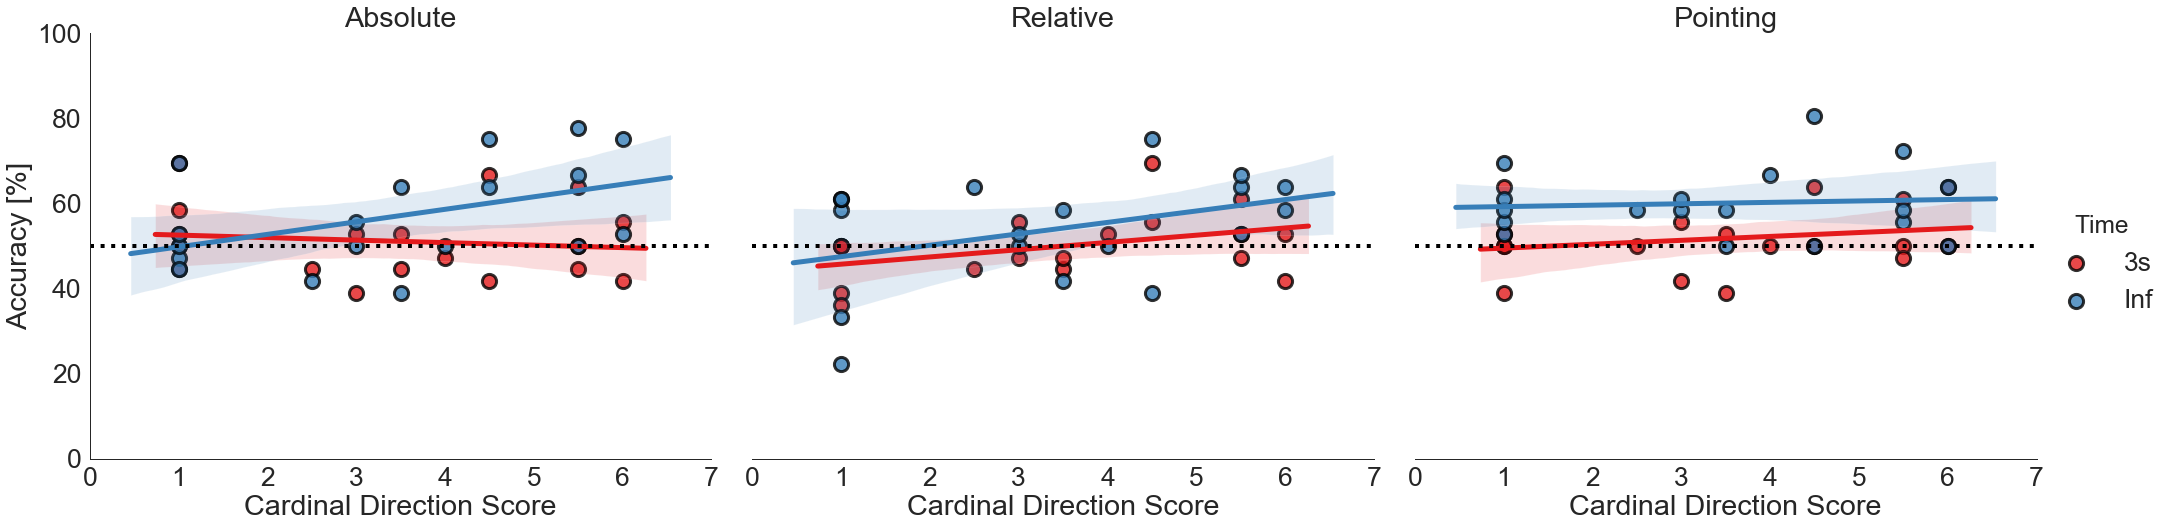

In [12]:
tmpdf = pd.read_csv(CSV_PATH + '/seahaven_VR_task_time_FRS_long.csv')
tmpdf.Accuracy = tmpdf.Accuracy*100

sns.set(context = "paper", style="white", palette="Set1", font_scale=3, rc={'figure.figsize':(30,10)})

tmpdf = (tmpdf
         .query('Scale == "Cardinal Direction"')
         .rename(columns={'Accuracy': 'Accuracy [%]'})
)
g = sns.lmplot(data=tmpdf, x='Score', y='Accuracy [%]',hue='Time', 
               col='Task', row='Scale',
               x_ci='ci', ci=95, n_boot=1000,
#                robust=True,
               height=8, aspect=1.2, 
               sharex=False, 
               scatter_kws={"s": 200, 'edgecolors':'k', 'linewidths': 3},
               line_kws={'linewidth': 5})

i=0
for ax,title in zip(g.axes.flat,['Absolute','Relative','Pointing']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i not in [1,4,7]:
        ax.spines['left'].set_visible(False)
        
    ax.set(ylim=(0,100),xlim=(0,7), xlabel = 'Cardinal Direction Score')
    ax.set_title(title)
# plt.show()
plt.savefig(PLOTS_PATH+'/VR_task_time_FRS_correlation.png', quality=90)

# 5.2 Accuracy as function of FRS scales in Map group

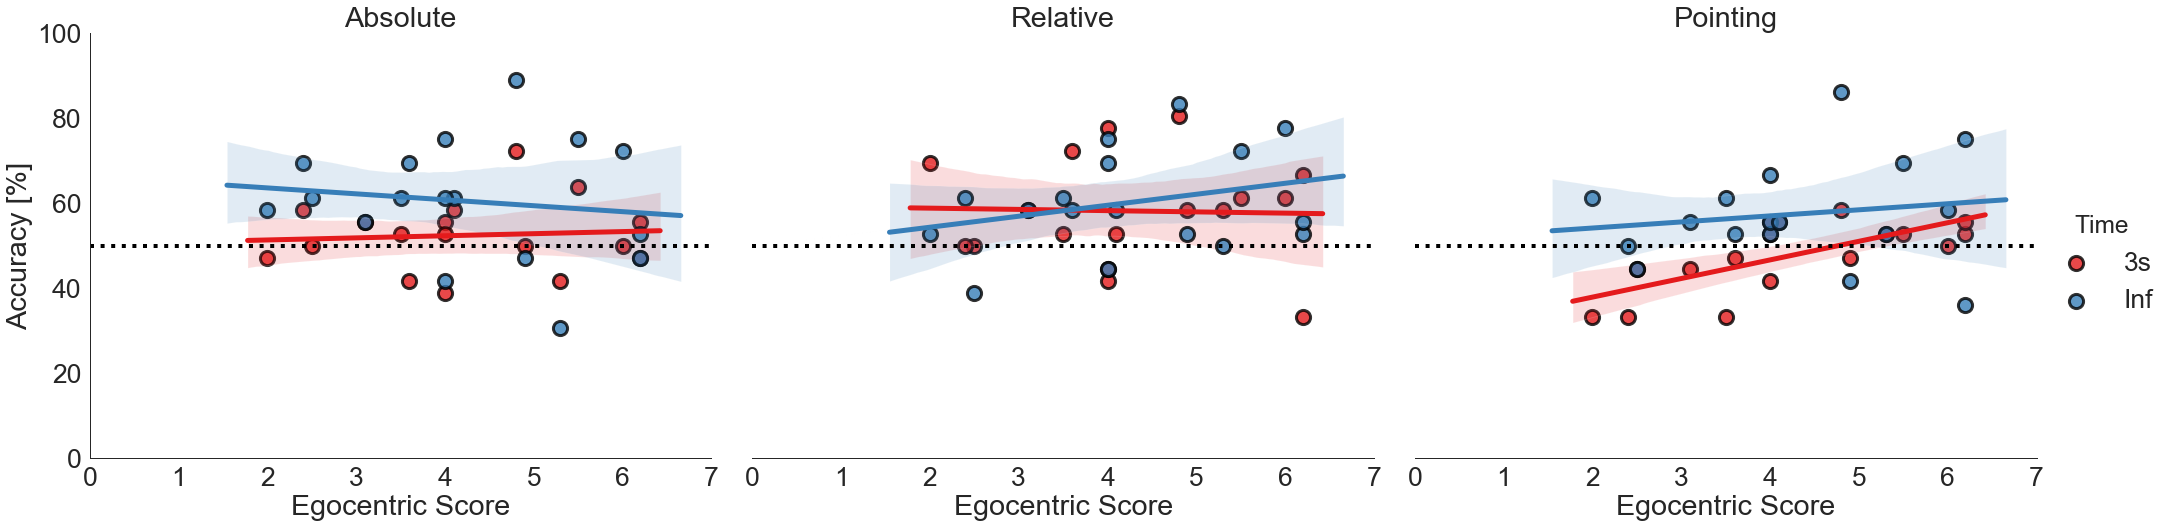

In [11]:
tmpdf = pd.read_csv(CSV_PATH + '/seahaven_map_task_time_FRS_long.csv')
tmpdf.Accuracy = tmpdf.Accuracy*100
# display(tmpdf.head())
sns.set(context = "paper", style="white", palette="Set1", font_scale=3, rc={'figure.figsize':(30,10)})

tmpdf = (tmpdf
         .query('Scale == "Egocentric"')
         .rename(columns={'Accuracy': 'Accuracy [%]'})
)
g = sns.lmplot(data=tmpdf, x='Score', y='Accuracy [%]',hue='Time', 
               col='Task', row='Scale',
               x_ci='ci', ci=95, n_boot=1000,
#                robust=True,
               height=8, aspect=1.2, 
               sharex=False, 
               scatter_kws={"s": 200, 'edgecolors':'k', 'linewidths': 3},
               line_kws={'linewidth': 5})

i=0
for ax,title in zip(g.axes.flat,['Absolute','Relative','Pointing']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i not in [1,4,7]:
        ax.spines['left'].set_visible(False)
        
    ax.set(ylim=(0,100),xlim=(0,7), xlabel = 'Egocentric Score')
    ax.set_title(title)
# plt.show()
plt.savefig(PLOTS_PATH+'/Map_task_time_FRS_correlation_egocentric.png', quality=90)

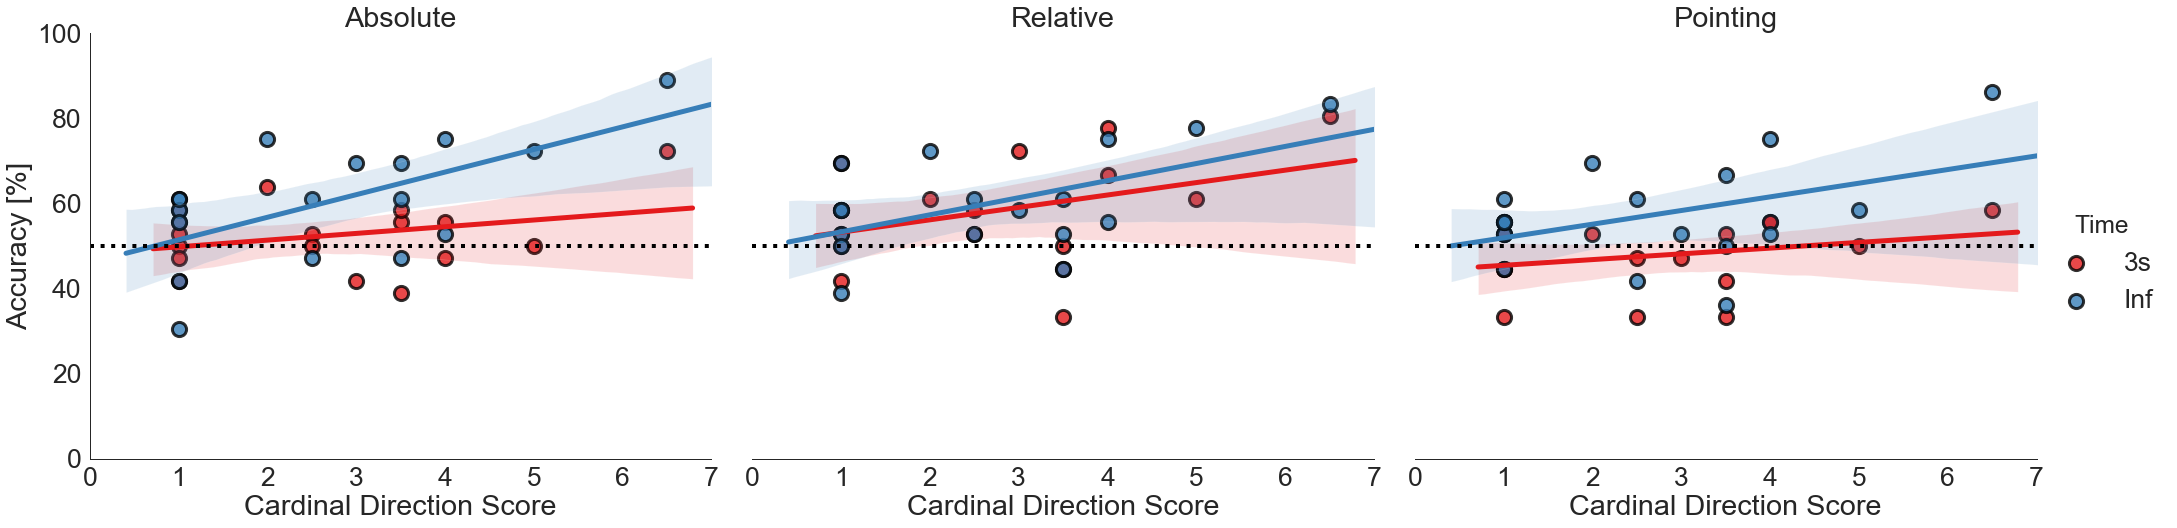

In [10]:
tmpdf = pd.read_csv(CSV_PATH + '/seahaven_map_task_time_FRS_long.csv')
tmpdf.Accuracy = tmpdf.Accuracy*100
# display(tmpdf.head())
sns.set(context = "paper", style="white", palette="Set1", font_scale=3, rc={'figure.figsize':(30,10)})

tmpdf = (tmpdf
         .query('Scale == "Cardinal Direction"')
         .rename(columns={'Accuracy': 'Accuracy [%]'})
)
g = sns.lmplot(data=tmpdf, x='Score', y='Accuracy [%]',hue='Time', 
               col='Task', row='Scale',
               x_ci='ci', ci=95, n_boot=1000,
#                robust=True,
               height=8, aspect=1.2, 
               sharex=False, 
               scatter_kws={"s": 200, 'edgecolors':'k', 'linewidths': 3},
               line_kws={'linewidth': 5})

i=0
for ax,title in zip(g.axes.flat,['Absolute','Relative','Pointing']):
    i = i+1
    ax.axhline(50, ls=':', color='k', lw=4)
    if i not in [1,4,7]:
        ax.spines['left'].set_visible(False)
        
    ax.set(ylim=(0,100),xlim=(0,7), xlabel = 'Cardinal Direction Score')
    ax.set_title(title)
# plt.show()
plt.savefig(PLOTS_PATH+'/Map_task_time_FRS_correlation.png', quality=90)

# 5.3 Modelling accuracy vs FRS scales 

### 5.3.1 VR group,  Task, Time, Scale separated

** spearmanr correlation are performed. Spearmanr correlation should be considered since our data is not normally distributed and the FRS scale values are ranked.

In [13]:
print(f'Bonferroni corrected p-value threshold = {0.05/18}')

Bonferroni corrected p-value threshold = 0.002777777777777778


In [50]:
tmpdf = pd.read_csv(CSV_PATH+'/seahaven_VR_task_time_FRS_long.csv')
    
df = tmpdf.query('Group =="VR" and Task == "Absolute" and Time=="3s" and Scale =="Egocentric" ')
print('Absolute Task 3s FRS Egocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Absolute" and Time=="3s" and Scale =="Allocentric" ')
print('Absolute Task 3s FRS Allocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Absolute" and Time=="3s" and Scale =="Cardinal Direction" ')
print('Absolute Task 3s FRS Cardinal Direction ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))


df = tmpdf.query('Group =="VR" and Task == "Absolute" and Time=="Inf" and Scale =="Egocentric" ')
print('Absolute Task Inf FRS Egocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Absolute" and Time=="Inf" and Scale =="Allocentric" ')
print('Absolute Task Inf FRS Allocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Absolute" and Time=="Inf" and Scale =="Cardinal Direction" ')
print('Absolute Task Inf FRS Cardinal Direction ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))


df = tmpdf.query('Group =="VR" and Task == "Relative" and Time=="3s" and Scale =="Egocentric" ')
print('Relative Task 3s FRS Egocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Relative" and Time=="3s" and Scale =="Allocentric" ')
print('Relative Task 3s FRS Allocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Relative" and Time=="3s" and Scale =="Cardinal Direction" ')
print('Relative Task 3s FRS Cardinal Direction ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))



df = tmpdf.query('Group =="VR" and Task == "Relative" and Time=="Inf" and Scale =="Egocentric" ')
print('Relative Task Inf FRS Egocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Relative" and Time=="Inf" and Scale =="Allocentric" ')
print('Relative Task Inf FRS Allocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Relative" and Time=="Inf" and Scale =="Cardinal Direction" ')
print('Relative Task Inf FRS Cardinal Direction ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))


df = tmpdf.query('Group =="VR" and Task == "Pointing" and Time=="3s" and Scale =="Egocentric" ')
print('Pointing Task 3s FRS Egocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Pointing" and Time=="3s" and Scale =="Allocentric" ')
print('Pointing Task 3s FRS Allocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Pointing" and Time=="3s" and Scale =="Cardinal Direction" ')
print('Pointing Task 3s FRS Cardinal Direction ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))



df = tmpdf.query('Group =="VR" and Task == "Pointing" and Time=="Inf" and Scale =="Egocentric" ')
print('Pointing Task Inf FRS Egocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Pointing" and Time=="Inf" and Scale =="Allocentric" ')
print('Pointing Task Inf FRS Allocentric ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="VR" and Task == "Pointing" and Time=="Inf" and Scale =="Cardinal Direction" ')
print('Pointing Task Inf FRS Cardinal Direction ')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))




Absolute Task 3s FRS Egocentric 


SpearmanrResult(correlation=0.41303181360019886, pvalue=0.08845941889138277)

Absolute Task 3s FRS Allocentric 


SpearmanrResult(correlation=0.1773633790225394, pvalue=0.48138274163318384)

Absolute Task 3s FRS Cardinal Direction 


SpearmanrResult(correlation=-0.13147043182162774, pvalue=0.6030604610558974)

Absolute Task Inf FRS Egocentric 


SpearmanrResult(correlation=0.06708378084109824, pvalue=0.7914122394922699)

Absolute Task Inf FRS Allocentric 


SpearmanrResult(correlation=0.3697948767055706, pvalue=0.13093869844290532)

Absolute Task Inf FRS Cardinal Direction 


SpearmanrResult(correlation=0.47971979432065853, pvalue=0.04394334206045076)

Relative Task 3s FRS Egocentric 


SpearmanrResult(correlation=0.41624120341029386, pvalue=0.08576702107677041)

Relative Task 3s FRS Allocentric 


SpearmanrResult(correlation=0.2975540801650032, pvalue=0.23045615267987443)

Relative Task 3s FRS Cardinal Direction 


SpearmanrResult(correlation=0.3718455802365386, pvalue=0.12865094405531358)

Relative Task Inf FRS Egocentric 


SpearmanrResult(correlation=0.25039234702525803, pvalue=0.31627500545275133)

Relative Task Inf FRS Allocentric 


SpearmanrResult(correlation=0.45473686718643963, pvalue=0.05795885069278436)

Relative Task Inf FRS Cardinal Direction 


SpearmanrResult(correlation=0.34335235762225613, pvalue=0.16302123615234446)

Pointing Task 3s FRS Egocentric 


SpearmanrResult(correlation=0.029364040423153652, pvalue=0.9079208867252861)

Pointing Task 3s FRS Allocentric 


SpearmanrResult(correlation=0.2545275496654194, pvalue=0.30808087754678387)

Pointing Task 3s FRS Cardinal Direction 


SpearmanrResult(correlation=0.14721106449378668, pvalue=0.5599496608174177)

Pointing Task Inf FRS Egocentric 


SpearmanrResult(correlation=0.40474399574362313, pvalue=0.09569564689606615)

Pointing Task Inf FRS Allocentric 


SpearmanrResult(correlation=0.31832029754689906, pvalue=0.19796734222462017)

Pointing Task Inf FRS Cardinal Direction 


SpearmanrResult(correlation=0.007961787925693497, pvalue=0.9749870468154679)

### 5.3.2 Map  group,  Task, Time, Scale separated
** Only showing Spearmanr correlation results

In [15]:
print(f'Bonferroni corrected p-value threshold = {0.05/18}')

Bonferroni corrected p-value threshold = 0.002777777777777778


In [49]:
tmpdf = pd.read_csv(CSV_PATH+'/seahaven_map_task_time_FRS_long.csv')

df = tmpdf.query('Group =="Map" and Task == "Absolute" and Time=="3s" and Scale =="Egocentric" ')
print('Absolute Task 3s FRS Egocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit')) # displays the correlation + pvalue
df = tmpdf.query('Group =="Map" and Task == "Absolute" and Time=="3s" and Scale =="Allocentric" ')
print('Absolute Task 3s FRS Allocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Map" and Task == "Absolute" and Time=="3s" and Scale =="Cardinal Direction" ')
print('Absolute Task 3s FRS Cardinal Direction model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))



df = tmpdf.query('Group =="Map" and Task == "Absolute" and Time=="Inf" and Scale =="Egocentric" ')
print('Absolute Task Inf FRS Egocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Map" and Task == "Absolute" and Time=="Inf" and Scale =="Allocentric" ')
print('Absolute Task Inf FRS Allocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Map" and Task == "Absolute" and Time=="Inf" and Scale =="Cardinal Direction" ')
print('Absolute Task Inf FRS Cardinal Direction model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))


df = tmpdf.query('Group =="Map" and Task == "Relative" and Time=="3s" and Scale =="Egocentric" ')
print('Relative Task 3s FRS Egocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Map" and Task == "Relative" and Time=="3s" and Scale =="Allocentric" ')
print('Relative Task 3s FRS Allocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Map" and Task == "Relative" and Time=="3s" and Scale =="Cardinal Direction" ')
print('Relative Task 3s FRS Cardinal Direction model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))



df = tmpdf.query('Group =="Map" and Task == "Relative" and Time=="Inf" and Scale =="Egocentric" ')
print('Relative Task Inf FRS Egocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Map" and Task == "Relative" and Time=="Inf" and Scale =="Allocentric" ')
print('Relative Task Inf FRS Allocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Map" and Task == "Relative" and Time=="Inf" and Scale =="Cardinal Direction" ')
print('Relative Task Inf FRS Cardinal Direction model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))


df = tmpdf.query('Group =="Map" and Task == "Pointing" and Time=="3s" and Scale =="Egocentric" ')
print('Pointing Task 3s FRS Egocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Map" and Task == "Pointing" and Time=="3s" and Scale =="Allocentric" ')
print('Pointing Task 3s FRS Allocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Map" and Task == "Pointing" and Time=="3s" and Scale =="Cardinal Direction" ')
print('Pointing Task 3s FRS Cardinal Direction model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))



df = tmpdf.query('Group =="Map" and Task == "Pointing" and Time=="Inf" and Scale =="Egocentric" ')
print('Pointing Task Inf FRS Egocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Map" and Task == "Pointing" and Time=="Inf" and Scale =="Allocentric" ')
print('Pointing Task Inf FRS Allocentric model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

df = tmpdf.query('Group =="Map" and Task == "Pointing" and Time=="Inf" and Scale =="Cardinal Direction" ')
print('Pointing Task Inf FRS Cardinal Direction model')
display(spstat.spearmanr(df.Accuracy.values, df.Score.values, nan_policy='omit'))

Absolute Task 3s FRS Egocentric model


SpearmanrResult(correlation=0.04396326126195392, pvalue=0.8669465933635692)

Absolute Task 3s FRS Allocentric model


SpearmanrResult(correlation=-0.09659533460372975, pvalue=0.7122762866652065)

Absolute Task 3s FRS Cardinal Direction model


SpearmanrResult(correlation=0.11528226925628603, pvalue=0.6595098977590983)

Absolute Task Inf FRS Egocentric model


SpearmanrResult(correlation=-0.12329767322090973, pvalue=0.6373173888043653)

Absolute Task Inf FRS Allocentric model


SpearmanrResult(correlation=0.221811894538119, pvalue=0.3922050060091624)

Absolute Task Inf FRS Cardinal Direction model


SpearmanrResult(correlation=0.521628384594349, pvalue=0.03175050858926353)

Relative Task 3s FRS Egocentric model


SpearmanrResult(correlation=0.06790128631406203, pvalue=0.7956833715165458)

Relative Task 3s FRS Allocentric model


SpearmanrResult(correlation=0.2148149785208508, pvalue=0.40768603892391253)

Relative Task 3s FRS Cardinal Direction model


SpearmanrResult(correlation=0.3491966137448062, pvalue=0.16949803074024455)

Relative Task Inf FRS Egocentric model


SpearmanrResult(correlation=0.12731806520971503, pvalue=0.6262933499278724)

Relative Task Inf FRS Allocentric model


SpearmanrResult(correlation=0.10877659940247499, pvalue=0.6777229474924025)

Relative Task Inf FRS Cardinal Direction model


SpearmanrResult(correlation=0.4482585901917521, pvalue=0.07113777185960217)

Pointing Task 3s FRS Egocentric model


SpearmanrResult(correlation=0.6876466338469472, pvalue=0.0022833161017455227)

Pointing Task 3s FRS Allocentric model


SpearmanrResult(correlation=0.3746273969012328, pvalue=0.13845814151741723)

Pointing Task 3s FRS Cardinal Direction model


SpearmanrResult(correlation=0.29474307507513986, pvalue=0.25079014915386655)

Pointing Task Inf FRS Egocentric model


SpearmanrResult(correlation=0.13226245609164572, pvalue=0.6128377733241283)

Pointing Task Inf FRS Allocentric model


SpearmanrResult(correlation=0.07416586322896021, pvalue=0.777260558722104)

Pointing Task Inf FRS Cardinal Direction model


SpearmanrResult(correlation=0.2351935057141492, pvalue=0.3635063145333809)

# 7. Reading path data of valid subjects

In [51]:
subdf = pd.read_csv('./Seahaven_alignment_project_24092019.csv', sep=';')
tmpdf = (
    subdf
    .query('Discarded != "yes"')
    .query('Measurement == 3')
    .query('Training == "VR"')
    [['Subject','Comments']] 
)
tmpdf[['m1','m2']] = tmpdf.Comments.str.replace(r'[A-Za-z\s\-\&\.\']','').str.strip().str.extract(r'\#([0-9]*)\#([0-9]*)')
subs = tmpdf.Subject.to_list()
subs.extend(tmpdf.m1)
subs.extend(tmpdf.m2)
display(len(subs))
columnnames = ['x', 'z', 'y', 'rx', 'rz', 'ry', 'timestamp', 'PL_timestamp' ]
# display(tmpdf)
meanNrot = {'Subject':[], 'IndNorth':[]}
for subj in tmpdf.Subject.values:
    tmpdf_1 = pd.read_csv(POS_PATH + f'positions_VP{subj}.txt', header=None, names=columnnames)
    meanNrot['Subject'].append(subj)
    meanNrot['IndNorth'].append(np.mean(tmpdf_1.rz.values[-30:]))
meanNrot = pd.DataFrame.from_dict(meanNrot)
meanNrot.Subject = meanNrot.Subject.astype(int)
# display(meanNrot) 

pathdf = pd.DataFrame()
for subj in subs:
    tmpdf_1 = pd.read_csv(POS_PATH + f'positions_VP{subj}.txt', header=None, names=columnnames)
    tmpdf_1['subject'] = subj
    pathdf = pd.concat([pathdf, tmpdf_1], ignore_index=True)

pathdf.x = pathdf.x.astype(int) - 180
pathdf.y = pathdf.y.astype(int) - 535

66

## 7.1 Participants subjective rating of True North in VR

In [18]:
meanNrot['deviationFromNorth'] = abs(meanNrot.IndNorth-270)
# display(meanNrot)   
tmpdf = pd.read_csv(CSV_PATH + '/seahaven_group_task_time_accuracy.csv')
# display(tmpdf.info())
tmpdf.Accuracy = tmpdf.Accuracy*100
tmpdf = (
    tmpdf
    .query('Group =="VR" and Task =="Absolute"')
    .groupby(['Subject','Time'])
    .agg({'Accuracy':'mean'})
#     .rename(columns={'Accuracy':'Accuracy [%]'})
    .reset_index()
)
# display(tmpdf)
meanNrot_time = meanNrot.merge(tmpdf, on='Subject')
# display(meanNrot_time)

,Subject,IndNorth,deviationFromNorth
0,1089,251.468000,18.532000
1,1155,303.582667,33.582667
2,2044,342.616000,72.616000
3,3023,231.698667,38.301333
4,3743,267.944667,2.055333
5,4272,268.389333,1.610667
6,5239,281.647667,11.647667
7,5253,269.567333,0.432667
8,5346,343.206667,73.206667
9,6398,313.171333,43.171333


,Subject,IndNorth,deviationFromNorth,Time,Accuracy
0,1089,251.468000,18.532000,3s,41.666667
1,1089,251.468000,18.532000,Inf,47.222222
2,1155,303.582667,33.582667,3s,47.222222
3,1155,303.582667,33.582667,Inf,50.000000
4,2044,342.616000,72.616000,3s,44.444444
5,2044,342.616000,72.616000,Inf,41.666667
6,3023,231.698667,38.301333,3s,66.666667
7,3023,231.698667,38.301333,Inf,75.000000
8,3743,267.944667,2.055333,3s,44.444444
9,3743,267.944667,2.055333,Inf,77.777778


Pearson correlation deviation from North for Absolute 3s
(0.01716762142294906, 0.9119281204598563)
Pearson correlation deviation from North for Absolute Inf
(0.01716762142294906, 0.9119281204598563)


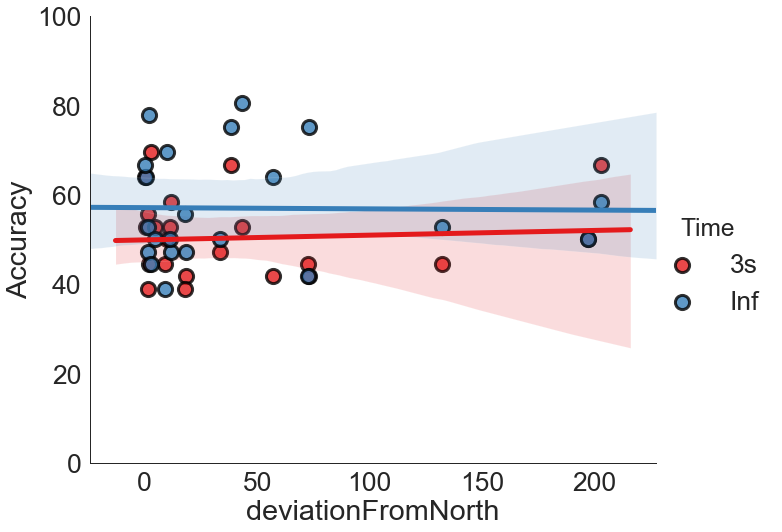

In [19]:
sns.set(context = "paper", style="white", palette="Set1", font_scale=3, rc={'figure.figsize':(10,10)})

g = sns.lmplot(data=meanNrot_time, x='deviationFromNorth', y='Accuracy',hue='Time', 
               x_ci='ci', ci=95, n_boot=1000,robust=True,
               height=8, aspect=1.2, 
               scatter_kws={"s": 200, 'edgecolors':'k', 'linewidths': 3},
               line_kws={'linewidth': 5})
g.set(ylim=(0,100))
df = meanNrot_time.query('Time == "3s"')
print("Pearson correlation deviation from North for Absolute 3s")
print(spstat.pearsonr(meanNrot_time.deviationFromNorth, meanNrot_time.Accuracy))
df = meanNrot_time.query('Time == "Inf"')
print("Pearson correlation deviation from North for Absolute Inf")
print(spstat.pearsonr(meanNrot_time.deviationFromNorth, meanNrot_time.Accuracy))

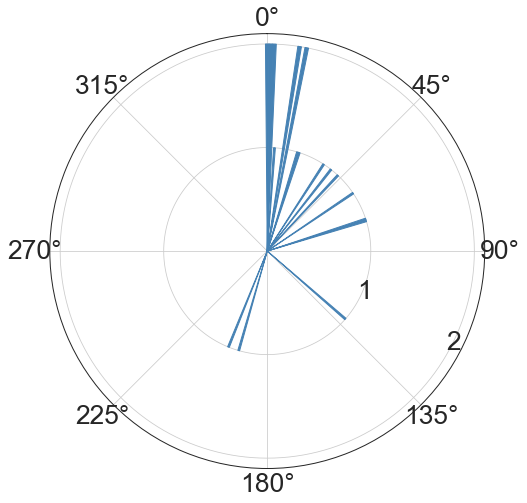

In [20]:
degrees = meanNrot.deviationFromNorth.values
radians = np.deg2rad(degrees)

bin_size = 1
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='steelblue', edgecolor='steelblue', linewidth=1)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rticks([ 1,  2]) 
ax.set_rmax(2.1)# Less radial ticks
ax.set_rlabel_position(120)
# ax.set_title("", va='bottom')
plt.savefig(PLOTS_PATH+'/deviationFromNorth.png', quality=90)
plt.show()

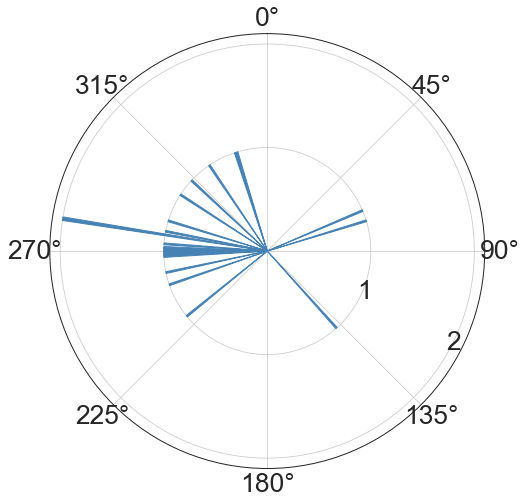

In [21]:
# theta = np.linspace(0.0, 2 * np.pi, 22, endpoint=False)
# ax = plt.subplot(111, projection='polar')
# meanNrot.IndNorth.plot.scatter(ax = ax)
degrees = meanNrot.IndNorth.values
radians = np.deg2rad(degrees)

bin_size = 1
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='steelblue', edgecolor='steelblue', linewidth=1)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rticks([ 1,  2]) 
ax.set_rmax(2.1)# Less radial ticks
ax.set_rlabel_position(120)
ax.grid(True)
plt.savefig(PLOTS_PATH+'/IndividualNorth.png', quality=90)
plt.show()

## 7.2 Density of Walked paths in Seahaven

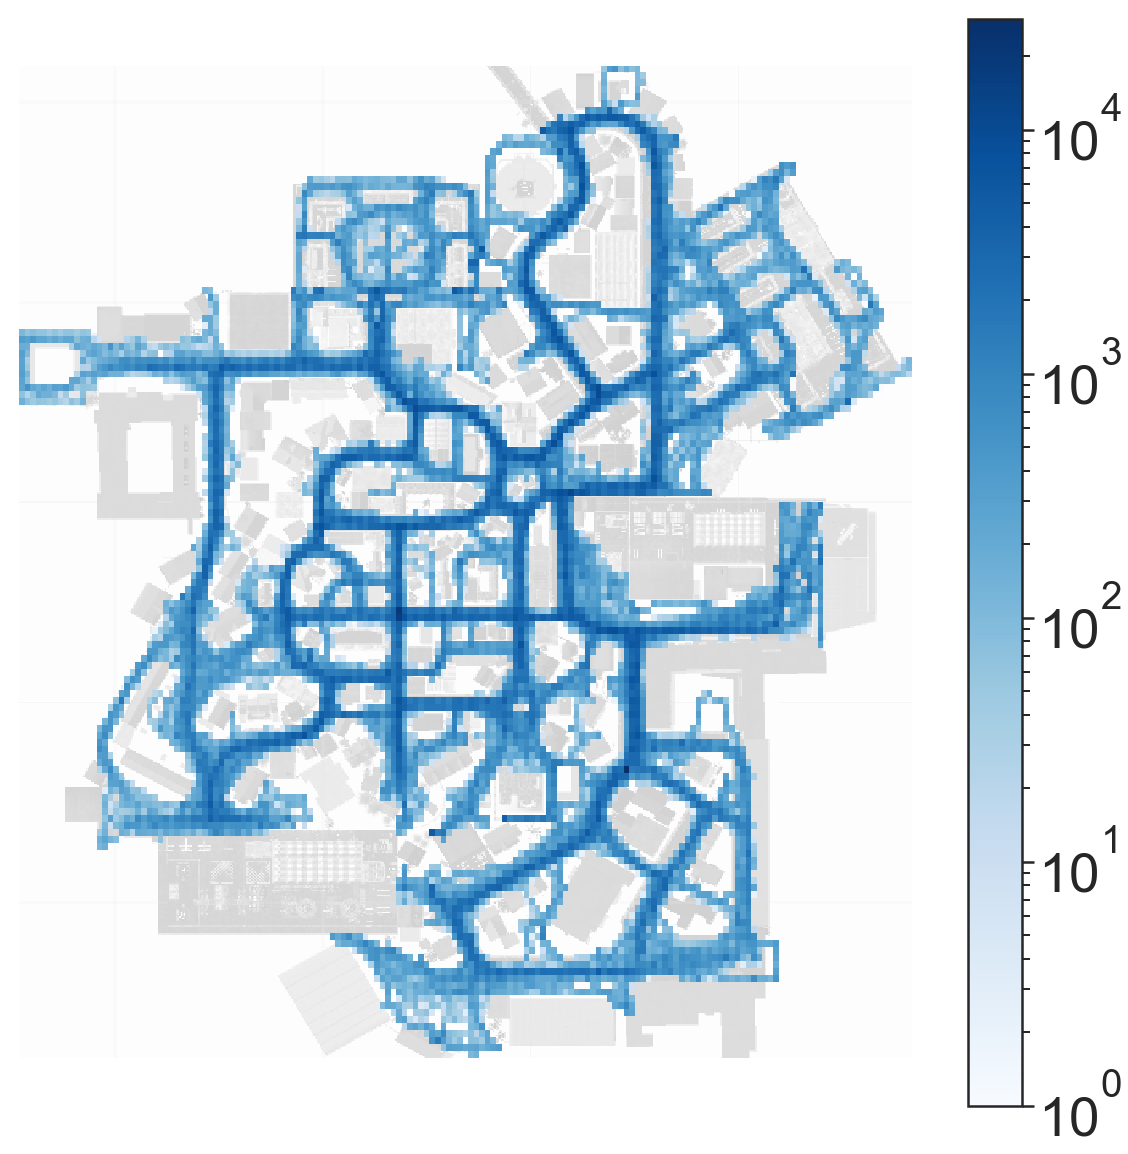

In [22]:
from matplotlib.colors import LogNorm, PowerNorm
map_img = plt.imread('./map_grey_1.png')

sns.set(context = "poster", style="white", palette="Set1", font_scale=2.5, rc={'figure.figsize':(12,15)})

_, ax = plt.subplots(figsize=(20,20))

im = ax.imshow(map_img, extent=[1, 450, 500,1], origin = 'lower')
H, xe, ye = np.histogram2d(pathdf.x.values, pathdf.y.values, bins=[143,161])
extent = [xe.min(),xe.max(),ye.min(),ye.max()]
img = ax.imshow(np.ma.masked_where(H == 0,H), interpolation='none', extent=[1, 450, 500,1], origin='lower', 
                cmap='Blues', norm=LogNorm())
# display(h[0].shape)
cbar = plt.colorbar(img, orientation= 'vertical' )

plt.gca().invert_yaxis()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_xticklabels([''])
plt.gca().set_yticklabels([''])
# plt.show()
plt.savefig(PLOTS_PATH+'/walked_paths.png', quality=90)

# 8.1 Familiarity of houses based on dwelling time (VR)

In [52]:
rep_measurements = pd.read_csv('{}/combinedSessions_newPartNumbers.csv'.format(EYE_DATA_PATH))
house_df = pd.read_csv('{}/seahaven_house_info.csv'.format(CSV_PATH))
# display(house_df.info())
# display(rep_measurements.head())

In [24]:
def mad_based_outlier(points, thresh=3.5):
    """ Median Absolute deviation based outlier detection.
    Ideally this method should be used to clean fixation durations."""
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score < thresh

./ET_data/gazes_25.csv not found, Moving on.
./ET_data/gazes_32.csv not found, Moving on.
House with maximum dwelling time:


C:\Users\akeshava\.conda\envs\conda_env\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


House          004_0
Time         18866.7
Samples          566
Distances    69.3057
Subject         8954
Name: 114481, dtype: object

<bound method NDFrame.describe of           House         Time  Samples  Distances  Subject
0         103_3   833.333333       25  13.115008     9437
2         054_0   266.666667        8  32.930764     9437
12        008_0  1166.666667       35  24.144433     9437
13        156_6   533.333333       16  76.231603     9437
14        013_0   266.666667        8  23.136485     9437
...         ...          ...      ...        ...      ...
120326  021_0_3  1566.666667       47  81.689590     8699
120327  021_0_3   466.666667       14  81.150785     8699
120328  021_0_3  1200.000000       36  81.288778     8699
120329  021_0_4   500.000000       15  85.663370     8699
120331  021_0_3   266.666667        8  81.735760     8699

[71603 rows x 5 columns]>

Text(0.5, 0, 'Dwelling Time (msec)')

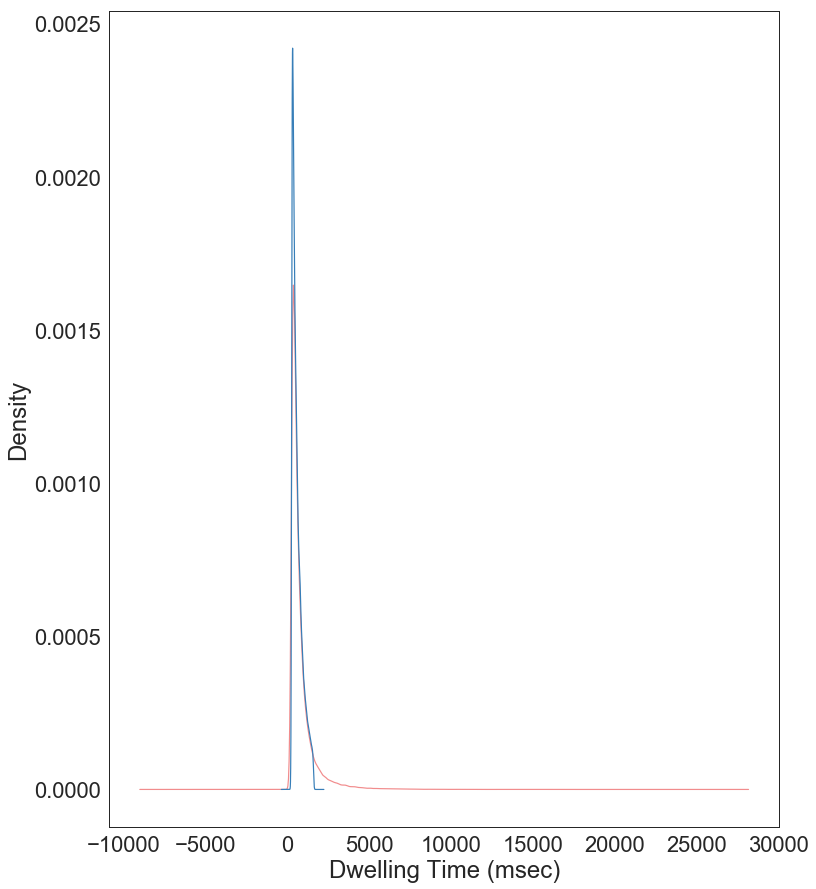

In [55]:
eye_df = pd.DataFrame()
for subID, ses3 in zip(rep_measurements.newPartNumber.values, rep_measurements.Session3.values):
    try:
        tmpdf = pd.read_csv('{}gazes_{}.csv'.format(EYE_DATA_PATH,subID))
        tmpdf['Subject'] = ses3
        eye_df = pd.concat([eye_df, tmpdf], ignore_index=True)
    except OSError:
        print('{}gazes_{}.csv not found, Moving on.'.format(EYE_DATA_PATH,subID))   

# display(eye_df.head())
# display(eye_df.describe())

sns.set(context = "paper", style="white", palette="Set1", font_scale=2.5, rc={'figure.figsize':(12,15)})

eye_df = eye_df.query('House != "NH" and House != "sky" and House != "noData"')
print("House with maximum dwelling time:")
display(eye_df.loc[eye_df.Time.argmax()])
ax = eye_df.Time.plot.kde(label='before filtering', alpha=0.5,)
# dwelling time has large outliers, needs to be cleaned
eye_df = eye_df.loc[mad_based_outlier(eye_df.Time)]
display(eye_df.describe)
eye_df.Time.plot.kde(label='after filtering',ax=ax)
ax.set_xlabel('Dwelling Time (msec)')

'Mean dwelling Time over houses and subjects: 574.7854218108351msec (SD=51.23039296332182)'

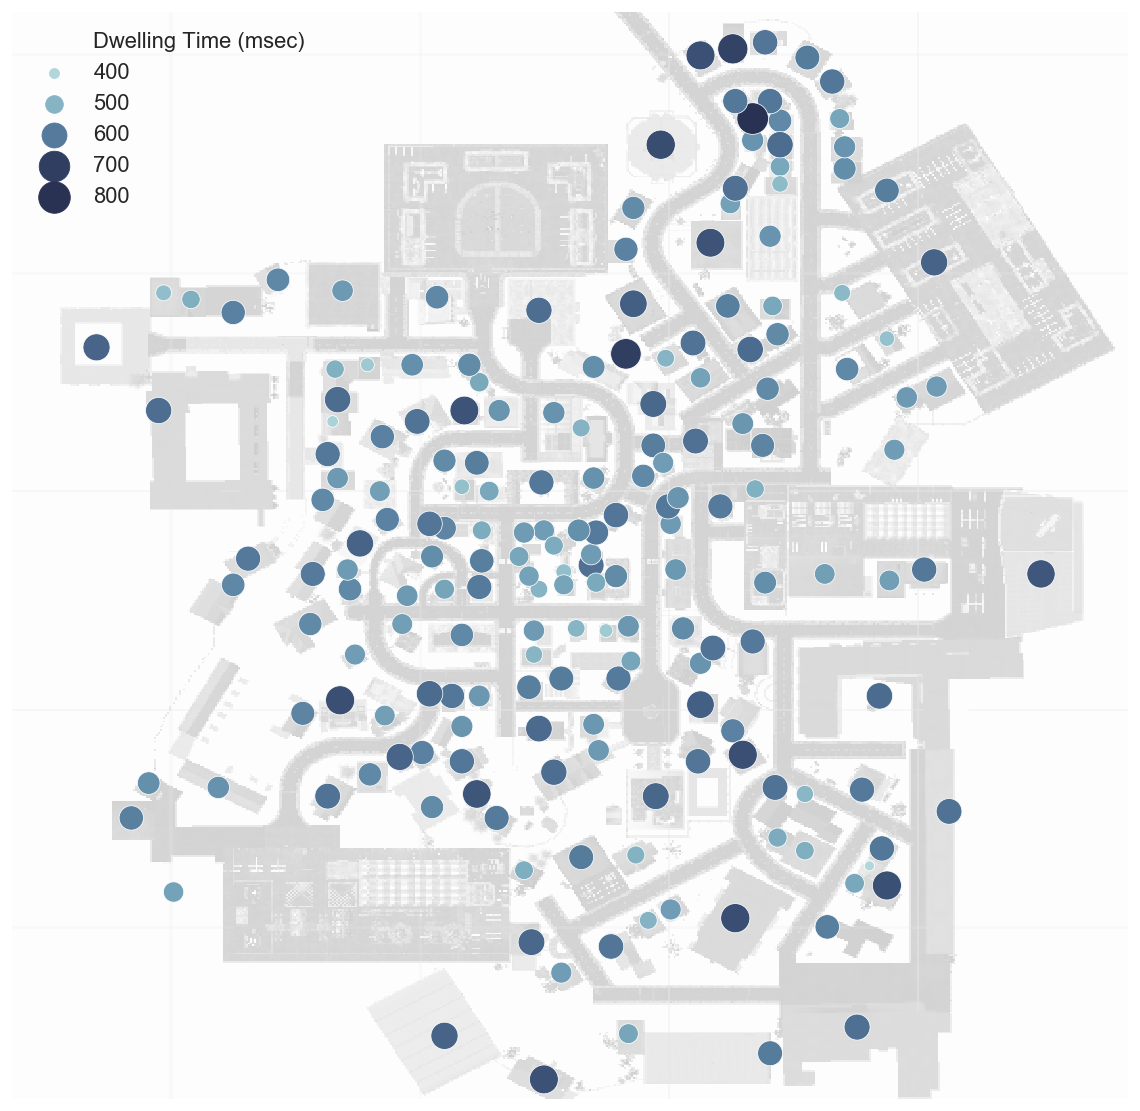

In [57]:
eye_df.House = eye_df.House.str.strip()
# sub_fixDur = eye_df.groupby(['Subject','House']).agg({'Time':'mean'})
eye_df[['HouseNr', 'Angle', 'Other']] = eye_df.House.str.split('_', expand=True)
eye_df.HouseNr = eye_df.HouseNr.astype(int)
eye_df = eye_df.merge(house_df, on = 'HouseNr')
sub_fixDur = eye_df.groupby(['HouseNr','x', 'y' ]).agg({'Time':'mean'}).reset_index()
display(f'Mean dwelling Time over houses and subjects: {sub_fixDur.Time.mean()}msec (SD={sub_fixDur.Time.std()})')
# rescaling x,y coordinates to fit 2D Map
sub_fixDur.x = sub_fixDur.x.astype(int) - 180
sub_fixDur.y = sub_fixDur.y.astype(int) - 535
sub_fixDur.Time = sub_fixDur.Time.astype(int)
# display(sub_fixDur.info())   


map_img = plt.imread('./map_grey.png')
# map_img = map_img.resize((450,500))
sns.set(context = "paper", style="white", palette="Set1", font_scale=2.5, rc={'figure.figsize':(12,9)})
# display(map_img.shape)
_, ax = plt.subplots(figsize=(20,20))

# cmap = sns.color_palette("Blues", as_cmap=True)
sub_fixDur.rename(columns={'Time':'Dwelling Time (msec)'}, inplace=True)

cmap = sns.cubehelix_palette(dark=0.2, light=0.8,rot=-.22, as_cmap=True)
ax.imshow(map_img, interpolation='nearest',aspect = 'auto',extent =[1,450,500,1], origin='upper')
ax = sns.scatterplot(x='y', y='x', hue='Dwelling Time (msec)', size='Dwelling Time (msec)',
                     sizes=(100, 1000), 
                     palette=cmap, 
                     data=sub_fixDur)


# plt.gca().invert_yaxis()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_xticklabels([''])
plt.gca().set_yticklabels([''])
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
plt.legend(frameon =False)
plt.savefig(PLOTS_PATH+'/dwellingTime.png', quality=90, transparent=True)

In [58]:
house_task_df = pd.read_csv(f'{CSV_PATH}/seahaven_VR_house_task_accuracy.csv')
sub_fixDur = eye_df.groupby(['HouseNr','x', 'y' ]).agg({'Time':'mean'}).reset_index()
# display(sub_fixDur)
# display(house_task_df.head())
house_task_df[['PrimeNr','TargetNr','TargetNr_wrong']] = house_task_df[['PrimeNr','TargetNr','TargetNr_wrong']]\
                                                                                    .astype(int, errors='ignore')
abs_house = house_task_df.query('Task == "Absolute"')
# display(abs_house.head())

abs_house = abs_house.groupby(['PrimeNr']).agg({'Accuracy':"mean"}).reset_index()
# display(abs_house.head())

abs_house.rename(columns={'PrimeNr':'HouseNr'}, inplace=True)
abs_house_time = abs_house.merge(sub_fixDur, on=['HouseNr'])
# display(abs_house_time.head())

abs_house_time = abs_house_time[['HouseNr', 'Accuracy', 'Time']]
# display(abs_house_time.head())


rel_house = house_task_df.query('Task == "Relative"')
rel_house = rel_house.groupby(['PrimeNr', 'TargetNr', 'TargetNr_wrong']).agg({'Accuracy':"mean"}).reset_index()
rel_house_time = rel_house.merge(sub_fixDur, left_on = ['PrimeNr'], right_on=['HouseNr'], suffixes =('','_p'))
rel_house_time = rel_house_time.merge(sub_fixDur, left_on = ['TargetNr'], right_on=['HouseNr'], suffixes =('','_t'))
rel_house_time = rel_house_time.merge(sub_fixDur, left_on = ['TargetNr_wrong'], right_on=['HouseNr'], suffixes =('','_tw'))
# display(rel_house_time.columns)

rel_house_time['minTime'] = rel_house_time[['Time','Time_t','Time_tw']].min(axis=1)
rel_house_time['minWhichHouse'] = rel_house_time[['Time','Time_t','Time_tw']].idxmin(axis=1)
rel_house_time['minWhichHouse'] = rel_house_time['minWhichHouse']\
                                        .map({'Time':'PrimeNr','Time_t':'TargetNr','Time_tw':'TargetNr_wrong'})
# display(rel_house_time.head())
# display(rel_house_time.columns)
rel_house_time = rel_house_time[['PrimeNr', 'TargetNr', 'TargetNr_wrong', 'Accuracy',\
                                 'minTime', 'minWhichHouse']]
rel_house_time.loc[rel_house_time.minWhichHouse == 'PrimeNr','HouseNr'] = rel_house_time.loc[rel_house_time.minWhichHouse == 'PrimeNr', 'PrimeNr']
rel_house_time.loc[rel_house_time.minWhichHouse == 'TargetNr','HouseNr'] = rel_house_time.loc[rel_house_time.minWhichHouse == 'TargetNr', 'TargetNr']
rel_house_time.loc[rel_house_time.minWhichHouse == 'TargetNr_wrong','HouseNr'] = rel_house_time.loc[rel_house_time.minWhichHouse == 'TargetNr_wrong', 'TargetNr_wrong']

rel_house_time = rel_house_time[['HouseNr','Accuracy','minTime']]

rel_house_time.rename(columns={'minTime':'Time'}, inplace=True)

# display(rel_house_time.head())

point_house = house_task_df.query('Task == "Pointing"')
# display(point_house)
point_house = point_house.groupby(['PrimeNr', 'TargetNr']).agg({'Accuracy':"mean"}).reset_index()
point_house_time = point_house.merge(sub_fixDur, left_on = ['PrimeNr'], right_on=['HouseNr'], suffixes =('','_p'))
point_house_time = point_house_time.merge(sub_fixDur, left_on = ['TargetNr'], right_on=['HouseNr'], suffixes =('','_t'))
# display(point_house_time.columns)

point_house_time['minTime'] = point_house_time[['Time','Time_t']].min(axis=1)
point_house_time['minWhichHouse'] = point_house_time[['Time','Time_t']].idxmin(axis=1)
point_house_time['minWhichHouse'] = point_house_time['minWhichHouse'].map({'Time':'PrimeNr','Time_t':'TargetNr'})
# display(point_house_time.head())
# display(point_house_time.columns)
point_house_time = point_house_time[['PrimeNr', 'TargetNr', 'Accuracy',\
                                 'minTime', 'minWhichHouse']]
point_house_time.loc[point_house_time.minWhichHouse == 'PrimeNr','HouseNr'] = point_house_time.loc[point_house_time.minWhichHouse == 'PrimeNr', 'PrimeNr']
point_house_time.loc[point_house_time.minWhichHouse == 'TargetNr','HouseNr'] = point_house_time.loc[point_house_time.minWhichHouse == 'TargetNr', 'TargetNr']

point_house_time = point_house_time[['HouseNr','Accuracy','minTime']]
point_house_time.rename(columns={'minTime':'Time'}, inplace=True)

# display(point_house_time.head())

house_acc_dwelltime = pd.concat([abs_house_time,rel_house_time,point_house_time], ignore_index=True)
# display(house_acc_dwelltime)

Pearson Correlation for dwellTime vs Accuracy
(0.14035272734445164, 0.039303136250822636)


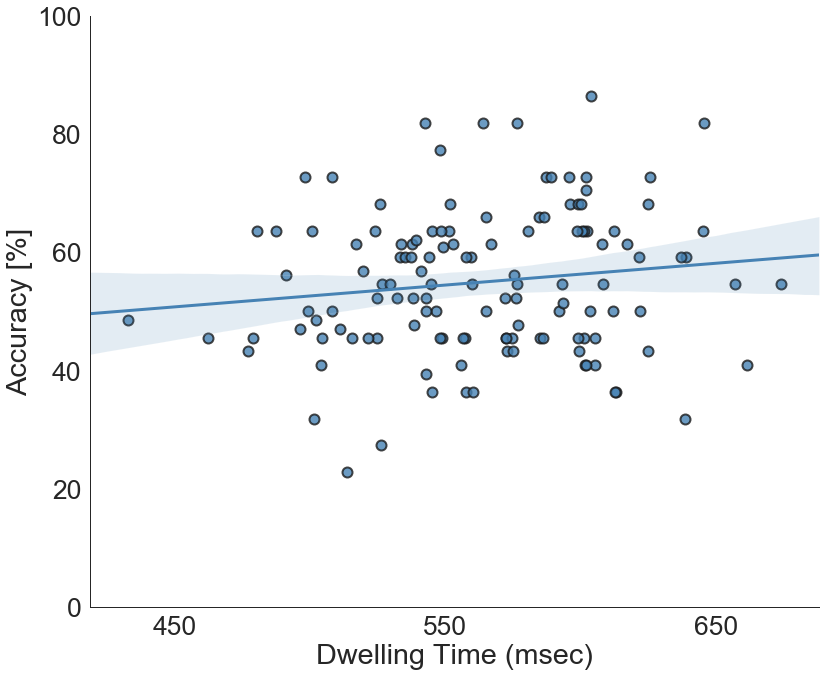

In [59]:
print("Pearson Correlation for dwellTime vs Accuracy")
print(spstat.pearsonr(house_acc_dwelltime.Accuracy,house_acc_dwelltime.Time))

df = house_acc_dwelltime.groupby(['HouseNr']).agg({'Time':'mean', 'Accuracy':'mean'}).reset_index()
df.Accuracy = df.Accuracy *100
df.rename(columns={'Time':'Dwelling Time (msec)', 'Accuracy':'Accuracy [%]'}, inplace=True)
# display(df)
sns.set(context = "paper", style="white", font_scale=3, rc={'figure.figsize':(10,10)})

ax = sns.lmplot(x='Dwelling Time (msec)', y='Accuracy [%]', data=df,height=10, aspect=1.2, 
                x_ci='ci', ci=95,
               scatter_kws={"s": 100, 'edgecolors':'k', 'linewidths': 2, 'color':'steelblue'},
               line_kws={'linewidth':3., 'color':'steelblue'})
ax.set(xticks=np.arange(450,700, 100), ylim=(0,100))
plt.savefig(PLOTS_PATH+'/dwellTime_vs_accuracy_VR.png', quality=90, transparent=True)

# 8.2 Familiarity of houses based on MouseClicks (Map)

'Mean Number of Clicks over houses and subjects: 9.622939236928874 (SD= 3.5623477049921437)'

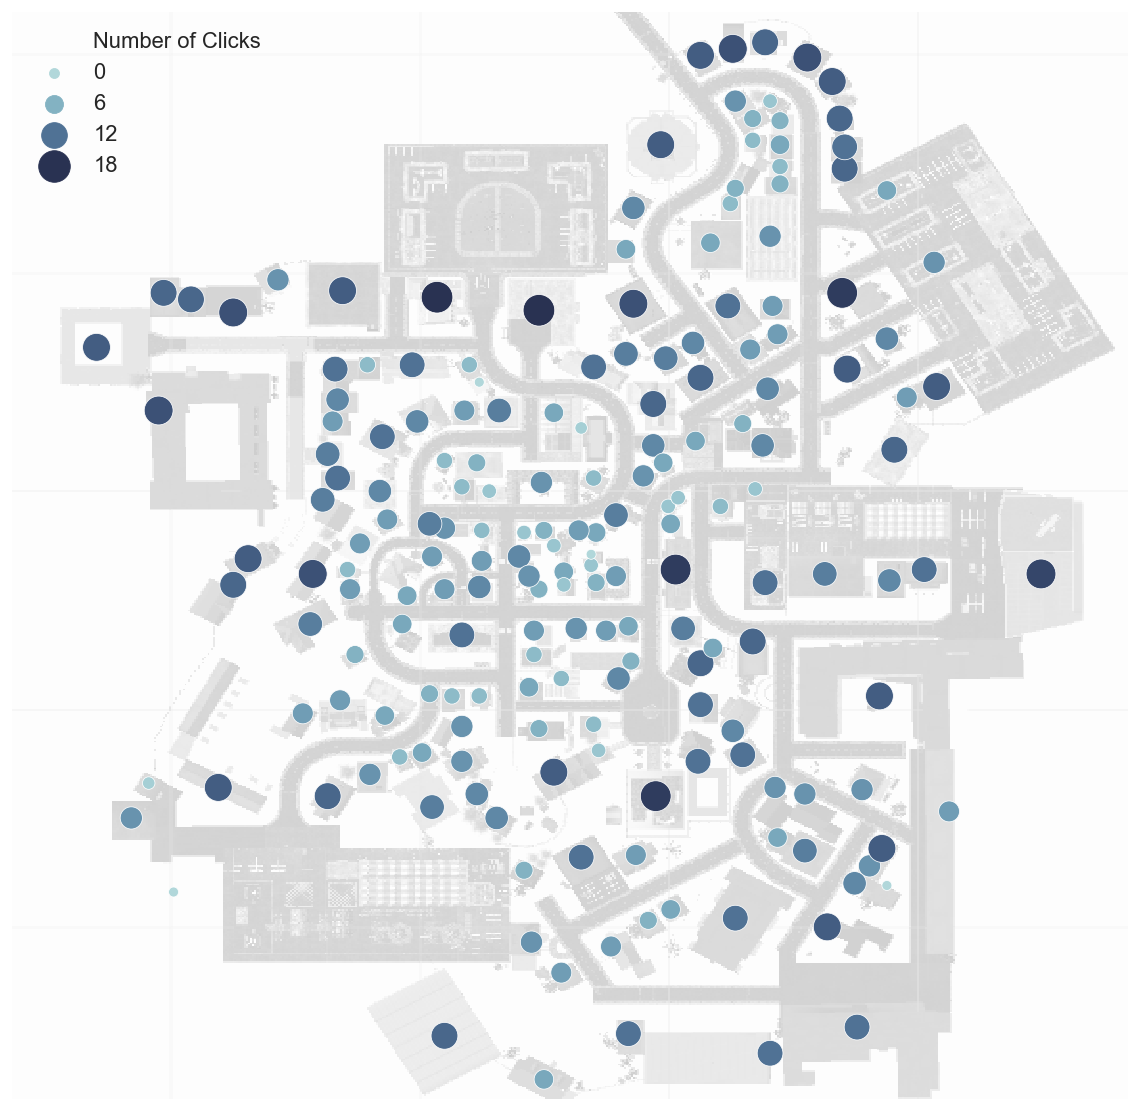

In [60]:
mousedf = pd.read_csv(f'{MOUSE_DATA_PATH}/ClickStatsAccumulated3M.csv')
mousedf = pd.melt(mousedf, id_vars='House', value_vars = [ col for col in mousedf.columns if col !='House'], 
                  var_name='subject', value_name='clickNum' )
mousedf = mousedf.merge(house_df, left_on = 'House', right_on='HouseNr')
# display(mousedf)
clickdf = mousedf.groupby(['HouseNr','x', 'y' ]).agg({'clickNum':'mean'}).reset_index()
display(f'Mean Number of Clicks over houses and subjects: {clickdf.clickNum.mean()} (SD= {clickdf.clickNum.std()})')

clickdf.x = clickdf.x.astype(int) - 180
clickdf.y = clickdf.y.astype(int) - 535
clickdf.clickNum = clickdf.clickNum.astype(int)
map_img = plt.imread('./map_grey.png')
# map_img = map_img.resize((450,500))
sns.set(context = "paper", style="white", palette="Set1", font_scale=2.5, rc={'figure.figsize':(12,9)})
# display(map_img.shape)
_, ax = plt.subplots(figsize=(20,20))

# cmap = sns.color_palette("Blues", as_cmap=True)
clickdf.rename(columns={'clickNum':'Number of Clicks'}, inplace=True)

cmap = sns.cubehelix_palette(dark=0.2, light=0.8,rot=-.22, as_cmap=True)
ax.imshow(map_img, interpolation='nearest',aspect = 'auto',extent =[1,450,500,1], origin='upper')
ax = sns.scatterplot(x='y', y='x', hue='Number of Clicks', size='Number of Clicks',
                     sizes=(100, 1000), 
                     palette=cmap, 
                     data=clickdf)


# plt.gca().invert_yaxis()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_xticklabels([''])
plt.gca().set_yticklabels([''])
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
plt.legend(frameon =False, loc='upper left')
plt.savefig(PLOTS_PATH+'/mouseclicks.png', quality=90, transparent=True)

In [61]:
house_task_df = pd.read_csv(f'{CSV_PATH}/seahaven_map_house_task_accuracy.csv')
clickdf = mousedf.groupby(['HouseNr','x', 'y' ]).agg({'clickNum':'mean'}).reset_index()
# display(clickdf)
# display(house_task_df.head())
house_task_df[['PrimeNr','TargetNr','TargetNr_wrong']] = house_task_df[['PrimeNr','TargetNr','TargetNr_wrong']]\
                                                                                    .astype(int, errors='ignore')
abs_house = house_task_df.query('Task == "Absolute"')
# display(abs_house.head())

abs_house = abs_house.groupby(['PrimeNr']).agg({'Accuracy':"mean"}).reset_index()
# display(abs_house.head())

abs_house.rename(columns={'PrimeNr':'HouseNr'}, inplace=True)
abs_house_time = abs_house.merge(clickdf, on=['HouseNr'])
# display(abs_house_time.head())

abs_house_time = abs_house_time[['HouseNr', 'Accuracy', 'clickNum']]
# display(abs_house_time.head())


rel_house = house_task_df.query('Task == "Relative"')
rel_house = rel_house.groupby(['PrimeNr', 'TargetNr', 'TargetNr_wrong']).agg({'Accuracy':"mean"}).reset_index()
rel_house_time = rel_house.merge(clickdf, left_on = ['PrimeNr'], right_on=['HouseNr'], suffixes =('','_p'))
rel_house_time = rel_house_time.merge(clickdf, left_on = ['TargetNr'], right_on=['HouseNr'], suffixes =('','_t'))
rel_house_time = rel_house_time.merge(clickdf, left_on = ['TargetNr_wrong'], right_on=['HouseNr'], suffixes =('','_tw'))
# display(rel_house_time.columns)

rel_house_time['minClick'] = rel_house_time[['clickNum','clickNum_t','clickNum_tw']].min(axis=1)
rel_house_time['minWhichHouse'] = rel_house_time[['clickNum','clickNum_t','clickNum_tw']].idxmin(axis=1)
rel_house_time['minWhichHouse'] = rel_house_time['minWhichHouse']\
                                        .map({'clickNum':'PrimeNr','clickNum_t':'TargetNr','clickNum_tw':'TargetNr_wrong'})
# display(rel_house_time.head())
# display(rel_house_time.columns)
rel_house_time = rel_house_time[['PrimeNr', 'TargetNr', 'TargetNr_wrong', 'Accuracy',\
                                 'minClick', 'minWhichHouse']]
rel_house_time.loc[rel_house_time.minWhichHouse == 'PrimeNr','HouseNr'] = \
rel_house_time.loc[rel_house_time.minWhichHouse == 'PrimeNr', 'PrimeNr']
rel_house_time.loc[rel_house_time.minWhichHouse == 'TargetNr','HouseNr'] = \
rel_house_time.loc[rel_house_time.minWhichHouse == 'TargetNr', 'TargetNr']
rel_house_time.loc[rel_house_time.minWhichHouse == 'TargetNr_wrong','HouseNr'] = \
rel_house_time.loc[rel_house_time.minWhichHouse == 'TargetNr_wrong', 'TargetNr_wrong']

rel_house_time = rel_house_time[['HouseNr','Accuracy','minClick']]

rel_house_time.rename(columns={'minClick':'clickNum'}, inplace=True)

# display(rel_house_time.head())

point_house = house_task_df.query('Task == "Pointing"')
# display(point_house)
point_house = point_house.groupby(['PrimeNr', 'TargetNr']).agg({'Accuracy':"mean"}).reset_index()
point_house_time = point_house.merge(clickdf, left_on = ['PrimeNr'], right_on=['HouseNr'], suffixes =('','_p'))
point_house_time = point_house_time.merge(clickdf, left_on = ['TargetNr'], right_on=['HouseNr'], suffixes =('','_t'))
# display(point_house_time.columns)

point_house_time['minClick'] = point_house_time[['clickNum','clickNum_t']].min(axis=1)
point_house_time['minWhichHouse'] = point_house_time[['clickNum','clickNum_t']].idxmin(axis=1)
point_house_time['minWhichHouse'] = point_house_time['minWhichHouse'].map({'clickNum':'PrimeNr','clickNum_t':'TargetNr'})
# display(point_house_time.head())
# display(point_house_time.columns)
point_house_time = point_house_time[['PrimeNr', 'TargetNr', 'Accuracy',\
                                 'clickNum', 'minWhichHouse']]
point_house_time.loc[point_house_time.minWhichHouse == 'PrimeNr','HouseNr'] = \
point_house_time.loc[point_house_time.minWhichHouse == 'PrimeNr', 'PrimeNr']
point_house_time.loc[point_house_time.minWhichHouse == 'TargetNr','HouseNr'] = \
point_house_time.loc[point_house_time.minWhichHouse == 'TargetNr', 'TargetNr']

point_house_time = point_house_time[['HouseNr','Accuracy','clickNum']]
point_house_time.rename(columns={'minClick':'clickNum'}, inplace=True)

# display(point_house_time.head())

house_acc_clickNum = pd.concat([abs_house_time,rel_house_time,point_house_time], ignore_index=True)
# display(house_acc_dwelltime)

Pearson Correlation for Number of Clicks vs Accuracy
(0.1653395069869593, 0.014988738523186745)


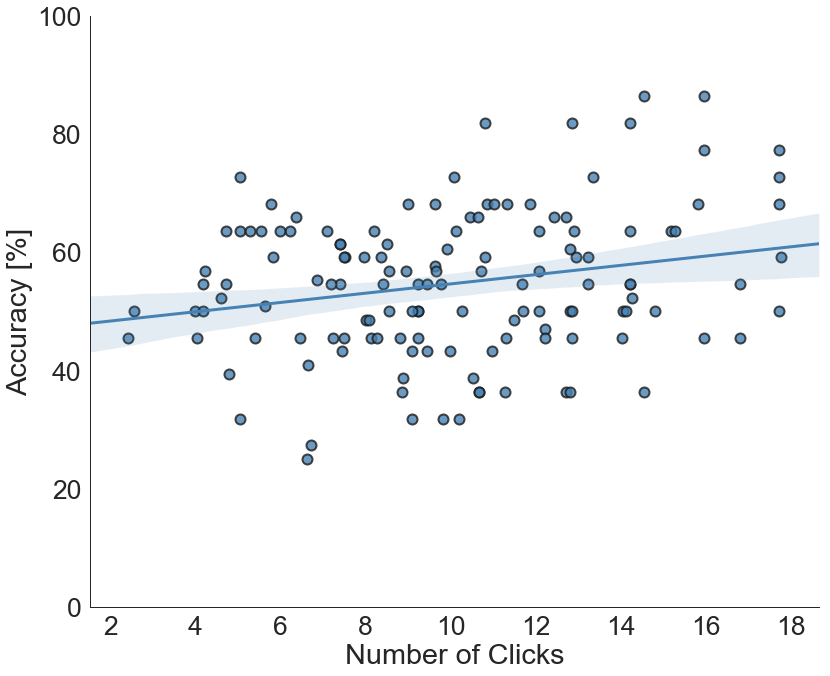

In [62]:
print("Pearson Correlation for Number of Clicks vs Accuracy")

print(spstat.pearsonr(house_acc_clickNum.Accuracy,house_acc_clickNum.clickNum))

df = house_acc_clickNum.groupby(['HouseNr']).agg({'clickNum':'mean', 'Accuracy':'mean'}).reset_index()
df.Accuracy = df.Accuracy *100
df.rename(columns={'clickNum':'Number of Clicks', 'Accuracy':'Accuracy [%]'}, inplace=True)
# display(df)
sns.set(context = "paper", style="white", font_scale=3, rc={'figure.figsize':(10,10)})

ax = sns.lmplot(x='Number of Clicks', y='Accuracy [%]', data=df,height=10, aspect=1.2, 
                x_ci='ci', ci=95,
               scatter_kws={"s": 100, 'edgecolors':'k', 'linewidths': 2, 'color':'steelblue'},
               line_kws={'linewidth':3., 'color':'steelblue'})
ax.set(ylim=(0,100))
plt.savefig(PLOTS_PATH+'/clickNum_vs_accuracy_Map.png', quality=90, transparent=True)

In [ ]:
raise

# Scratch Pad


In [ ]:
tmpdf = pd.read_csv(CSV_PATH + '/seahaven_map_task_time_FRS.csv')
display(tmpdf.columns)
tmpdf = tmpdf.loc[:,['Absolute_3s', 'Absolute_Inf','Relative_3s',
       'Relative_Inf',  'Pointing_3s', 'Pointing_Inf', 'Egocentric', 'Allocentric',
       'Cardinal Direction']]
corr = tmpdf.corr(method='spearman')

sns.set(context = "paper", style="white", palette="Set1", font_scale=2.5, rc={'figure.figsize':(22,22)})

mask = np.zeros_like(corr)
display(mask)
mask[np.tril_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr,mask = mask, vmin=-1, vmax=1, square=True, center=0, 
                annot=True,linewidths=1, cmap="coolwarm", 
                fmt='.2f',annot_kws={"fontsize":18, 'color':'k'},
                cbar_kws={"shrink": .82})

plt.savefig(PLOTS_PATH+'/Map_task_time_FRS_correlation.png', quality=90)

In [ ]:
tmpdf = pd.read_csv(CSV_PATH + '/seahaven_VR_task_time_FRS.csv')
display(tmpdf.columns)
tmpdf = tmpdf.loc[:,['Absolute_3s', 'Absolute_Inf','Relative_3s',
       'Relative_Inf',  'Pointing_3s', 'Pointing_Inf', 'Egocentric', 'Allocentric',
       'Cardinal Direction']]
corr = tmpdf.corr(method='spearman')

sns.set(context = "paper", style="white", palette="Set1", font_scale=2.5, rc={'figure.figsize':(22,22)})

mask = np.zeros_like(corr)
display(mask)
mask[np.tril_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr,mask = mask, vmin=-1, vmax=1, square=True, center=0, 
                annot=True,linewidths=1, cmap="coolwarm", 
                fmt='.2f',annot_kws={"fontsize":18, 'color':'k'},
                cbar_kws={"shrink": .82})

plt.savefig(PLOTS_PATH+'/VR_task_time_FRS_correlation.png', quality=90)
